# Floating Point Numbers

## Introduction
### The Base Ten System
A floating point number is a number that has no fixed number of digits before or after a decimal point. Think of when you buy food, there's no stopping you (except for maybe you're income) from buying as much food as you want. This will increase your bill from $\$10.99$ to $\$100.99$ to $\$1000.99$ and so on, there's no limit on the number of digits. A way that we represent numbers that are floats is the following, 

$$...d_2d_1d_0.d_{-1}d_{-2}...\ \text{where} \ 0 \leq d_i \leq 9 \ \text{and} \ i = 1,2,3...,n$$. 

What's really going on in this representation is that each digit in the sequence has a different value based on where it is. The index of the number represents what power the base is to, for example $d_1$ would be the coefficient multiplied by $10^1$. Let's break down the number $489.128$; 

$$4\times 10^2 + 8\times 10^1 + 9 \times 10^0 + 1 \times 10^{-1} + 2 \times 10^{-2} + 8 \times 10^{-3} = 489.128.$$

This is cool, but not very helpful for everyday use or is it?

### The Base Two System 
The base two system or binary system is a very import system when dealing with computers. If you're are not familiar with how computers work you may have never really thought that the way that we handle numbers and the way it handles numbers is very different. The computer, in the most broad sense, is just a really intricate series of circuits that need to be turn on and off. The binary system is perfect for this since it only has two values $0,1$; true, false; on, off. The form for binary is $...b_2b_1b_0.b_{-1}b_{-2}...$ where $0 \leq b_i \leq 1$ and $i = 1,2,3...,n$. Using the method above, we can represent binary numbers as decimals. Let's take $10.01$ for example

$$(10.01)_2 = 1\times 2^1 + 0\times 2^0 + 0 \times 2^{-1} + 1\times 2^{-2} = (1.5)_{10}$$.

Another really helpfuly way to represent these binary numbers is the use of scientific notation. Just like in our decimal system, we move the point to the left most, non zero number, then multiply that by the base to some exponent. 

$$b_0.b_{-1}b_{-2}... \times 2^n, \ 0 \leq b_i \leq 1 \  \text{and} \ n \in \textbf{Z}$$ 

### Representing Numbers a Computer
We've already established that the number system of a computer is binary, but one thing we need to talk about is that fact that computers only have finite accuracy. If I asked you for the ratio of a circle's circumference to it's diameter you'd say 'Oh that's easy,' write  $\pi$ and walk away like you're a genius, but if I asked you to write $\pi$ on a computer what would you do? Computers dont like infinte floating point numbers and due to some careful planning, there's standards put into place for how much $\pi$ we want; well not specifically $\pi$ but any floating point number. The formula for this is

$$(-1)^s \times (1.\textbf{mantissa}) \times 2^{\textbf{exponent} - \textbf{bias}}$$

where the $s$ varies between $0$ and $1$ for positive and negative numbers, the **mantissa** is the amount of digits to the right of the binary point (decimal point in base 10) and **exponent** - **bias** is how far to move the binary point to either the left or right. There's plenty of questions that arise when we know about the finite accuracy of the computer, what's the smallest number? The largest? What is smallest increment we can have? Well those are great questions so let's go ahead and answer them.

## Part A.
### Machine Epsilon
The smallest increment we can have is called 'machine epsilon;' it's the smallest value that when added to one doens't give you one, which may seem weird but is necessary when you don't have unlimited space. Let's refer back to the formula in the introduction that had a term called the mantissa. Since we are working with binary numbers, I thought that the smallest possible number that could be added to 1 is $(.000...001)_2$, but we don't know its length. Also, from the interduction we know numbers to the right of the binary point are represented as two to some negative exponent. To find the length of the mantissa I created an algorithm that would decrease the exponent by one for each iteration where $1 + 2^{-m} \neq 0$. Once it equals zero that means we've gone too far and need to go back one iteration.

In [1]:
def find_epsilon():
    'Find the smallest possible number that a computer can represent'
    n = -1
    y = 2.**(n)
    while 1 + y != 1:
        n -= 1
        y = 2.**(n)
    print('The exponent is', 1+n) 
    print('Machine epsilon is', 2.**(1 + n))

In [2]:
find_epsilon()

The exponent is -52
Machine epsilon is 2.220446049250313e-16


After running the algorithm, its apparent that the length of the mantissa in a 64-bit system is 52 so the smallest increment that the computer can make is $2^{-52}$. This is useful in also finding the amount of bits used for the exponent. We know that 1 bit is used for keep track of the sign and 52 are used for the mantissa so that means 11 are used for the exponent. 

### Largest Number 
Next question to answer is the largest possible number that a computer can represent. This one was fairly simple, we only need to run a loop of $2^n$ and increment until python returns an overflow error. This means we ran out of memory to hold the number and can't go any further. But before I do that I want to test of the value for the exponent that I got when finding machine epsilon. If 11 is the amount of bits that the exponent stores that means that our largest number should just be 2 to the power of $2^{11}$.

In [3]:
n = 2**11
print(2.**n)

OverflowError: (34, 'Result too large')

This returned the overflow error I mentioned which meant that the bit size of the number couldn't be represented, meaning that $2^{11}$ isn't right for the exponent. Im fairly certain that 11 bits is correct, since its just the difference of 64 and the mantissa plus sign bits, but I'll try the other method I described. 

In [4]:
def find_largest():
    'Find the largest float a compter can store'
    n = 1
    while True:
        try:
            x = 2.0**n
            n += 1
        except:
            print('The exponent is', n -1) 
            print('The largest number is', 2.0**(n - 1))
            break

In [5]:
find_largest()

The exponent is 1023
The largest number is 8.98846567431158e+307


The largest exponent we can have is $n = 1023$ which is very close to $2^{10}$, which means we are missing one bit. One thing that im just now taking into consideration is the space required to hold very small numebrs. Having $2^{11}$ be the exponent would only allow for large numbers, but would not allow you to have small numbers. 

### Smallest Number
The first idea to try would be to just put the same algorithm for the largest number under 1 and see what we get as a value for the exponent. 

In [6]:
def find_smallest():
    'Find the samllest float a computer can represent'
    n = 1
    while True:
        try:
            x = 1/2.0**n
            n += 1
        except:
            print('The exponent is', -(n -1)) 
            print('The smallest number is', 1/2.0**(n - 1))
            break

In [7]:
find_smallest()

The exponent is -1023
The smallest number is 1.1125369292536007e-308


This result makes a lot of sense since we are using the largest number as the divisor. To avoid an overflow error it can only go out to an exponent of $n = -1023$, but this doesnt add up to our $2^{11}$ that we need we are 1 number off. $1023 + 1023 + 1 = 2047$, the one being there to represent the zero exponent. This is also apparent when we try say $n = -1024$

In [8]:
2**-1024

5.562684646268003e-309

To figure this out I developed a new algorithm to fnd the smallest value, but came into an issue of an infinite loop.

In [9]:
def find_smallest_new():
    n = 1
    while True:
        try:
            x = 2.0**(-n)
            n += 1
        except:
            print('The exponent is', -(n -1)) 
            print('The smallest number is', 2.0**-(n - 1))
            break

After some trouble shooting I came to the conclusion of how python handles its really small numbers. Instead of return an overflow error like for the largest number, it actually returns zero. For my loop, I had a try, except statment that went to the except block whenever python ran into an error. The problem is returing zero is not an error which made this loop go on forever. Now that I know that, my new and final code for the smallest number is as follows.

In [10]:
def find_smallest_final():
    g = 1
    x = 1
    while x > 0:
            g += 1
            x = 2.0**(-g)
    print('The exponent is', g - 1)
    print('The smallest number is', 2**-(g-1))

In [11]:
find_smallest_final()

The exponent is 1075
The smallest number is 5e-324


### The Bias
The algorithm now checks for when x will be zero, which will only happen when the number gets too small. This is great news, but now I come into the issue that $1023 + 1074 + 1 = 2098$ which isn't $2^{11}$. What has happened is that I believe I've found the denormalized numbers. Denormalized numbers occur when we have an exponent of all zeros so that the usual formula

$$(-1)^s \times (1.\textbf{mantissa}) \times 2^{\textbf{exponent} - \textbf{bias}}$$

becomes 

$$(-1)^s \times (0.\textbf{mantissa}) \times 2^{\textbf{1} - \textbf{bias}}$$

Because of the extra space due to the fact we know we don't have to store a $1$ out front, we have roughly $50$ extra numbers we can represent, close to the length of the mantissa. That means that the exponent is indeed $2^{11}$, but we have extra memory due to denormalization which is the cause of the extra numbers. Now to compute the bias, we just need equal representation of both large and small numbers, to do that we have 

$$\frac{2^{11}}{2} = 1024$$

But we need to take into consideration $0$ so the bias is finally

$$1024 - 1 = 1023$$

With this new information we are left with 

$$(-1)^s \times (1.\textbf{mantissa}) \times 2^{\textbf{exponent} - 1023}$$

With all this information we can complete the following table.

| Number        | sign | Exponent | Mantissa       | Value           |
| ------------- |:----:|---------:| --------------:|:----------------|
| Biggest Float     |  0   |    111...111    |   111...111             |   $8.988\times 10^{307}$   |   
| 1 + $\epsilon$   |  0  |  011...111  | 000...001  |  $1 + 2^{-52}$  |
| Smallest Normalized    |   0   |    000...001      |     000...000           |  $4.450\times 10^{-308}$  |
| "First" denormalized |    0  |      000...000    |    100...000            |   $5.563\times 10^{-309}$   |
| Smallest Float | 0 | 000...000 | 000...000 | $5\times 10^{-324}$|

## Part  B.
This idea of precision and accuracy seems a little abstact since we don't deal with numbers of that magnitude often. We'll lets look an example of when this concept of memory and sotrage comes into play. The graph of the function $\log(1 + x)/x$ is as follows.

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math

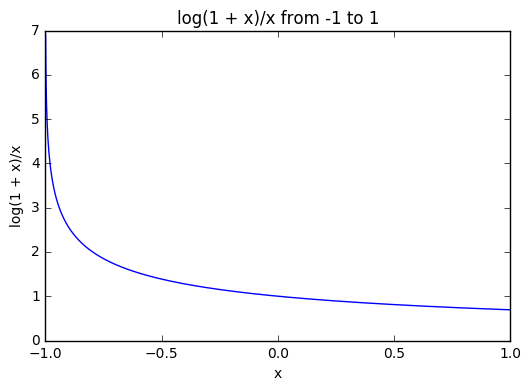

In [14]:
np.seterr(divide='ignore', invalid='ignore')
end = 1
x = np.linspace(-end,end,2001)
y = np.where(x == 0, 1.0, np.log(1 + x)/x)
plt.plot(x,y, label = 'log(1 + x)/x')
plt.title('log(1 + x)/x from -1 to 1')
plt.xlabel('x')
plt.ylabel('log(1 + x)/x')
plt.show()

From just looking at the function before ploting it, we can already tell there should be an issue around $x = 0$. Luckily for us, as $x \rightarrow 0$ we have $0/0$ which allows us to use L'Hospital's rule, which then gives us 1 as $x \rightarrow 0$. From this graph alone its hard to see anything wrong with it, but if we zoom in we'll be able to see the issue arise. To zoom in we'll just use a smaller range in linspace. What should happen when we zoom in is we should get a straight line, but that's not the whole story.

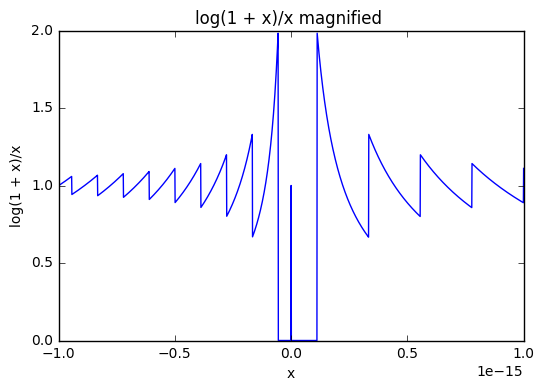

In [15]:
np.seterr(divide='ignore', invalid='ignore')
end = .000000000000001
x = np.linspace(-end,end,2001)
y = np.where(x == 0, 1.0, np.log(1 + x)/x)
plt.plot(x,y,label = 'log(1 + x)/x')
plt.title('log(1 + x)/x magnified ')
plt.xlabel('x')
plt.ylabel('log(1 + x)/x')
plt.show()

When we get down to resolutions of $10^{-15}$, we can see that the graph doesn't behave like we thought it would. What's happening is $x$ is getting so small that its around the machine epsilon magnitude. As x get's closer to zero it's falling in between the points of where a number can increment, so like between $\epsilon$ and $2\epsilon$ and so on. The rounding process is a little complicated, but you can see it in action with the peaks and valleys of the graphs. Another point of interests is that at a certain range the function is just zero, this is the intance where $1 + \epsilon = 1$, since $\log(1) = 0$. One final thing to observe is that the graph is not symmetrical around $x = 0$, this is because of something else we found when testing for largest and smallest numbers. At the point to the left of zero, we have negative numbers, which makes $1 + x < 1$, that means we are getting into denormalized numbers, which we saw allows for more accurate values since we have more memory to work with.

### Function approximation
Using the Taylor series we are able to approximate the function around a certain point, the point in this case being zero. From class we were able to get up to the 4th term approximation where we had $O(x^3)$

$$g(x) = \frac{\log(1-x)}{x} = 1 - \frac{x}{2} + \frac{x^2}{3} + Q_4, \ \text{where} \ Q_4 = \frac{x^3}{4(1 + \xi)^4} \\ \text{and} \ a \leq \xi \leq b \ \text{where $a$ and $b$ are the domain where the function is being evaluated}$$.

To extend out to one more term is fairly simple, the expansion in summation form is

$$g(x) = \sum_{i = 0}^n \frac{(-1)^i x^i}{i + 1}$$

so to go to the fifth term is just

$$g(x) = \frac{\log(1-x)}{x} = 1 - \frac{x}{2} + \frac{x^2}{3} - \frac{x^3}{4} + Q_5, \ \text{where} \ Q_5 = \frac{x^4}{5(1 + \xi)^5}$$.

One thing to keep in mind is that the error term is a little special and doesn't follow the summation exactly, instead of being evaluated at $x = 0$ its evaluated at some $\xi$. For that term specifically it has a $1/(1 + \xi)^i$ term that must be attached to it. If we plot this approximation with the true function we should notice that it won't be an exact replica for values $x > 0$ or $x < 0 $, but for $x \sim 0$, we will notice something import

In [16]:
def Taylor(x):
    return 1 - (x/2) + (x**2/3) - (x**3/4)  

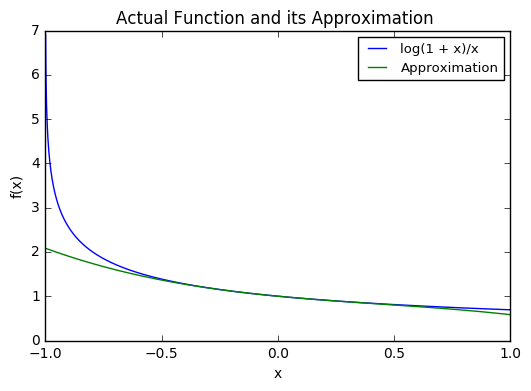

In [17]:
np.seterr(divide='ignore', invalid='ignore')
end = 1
approx = []
approy = []
x = np.linspace(-end,end,2001)
y = np.where(x == 0, 1.0, np.log(1 + x)/x)

for i in x:
    approx.append(i)
    approy.append(Taylor(i))
plt.plot(x,y, label = 'log(1 + x)/x')
plt.plot(approx,approy, label = 'Approximation')
plt.legend(prop={'size':9.5})
plt.title('Actual Function and its Approximation ')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

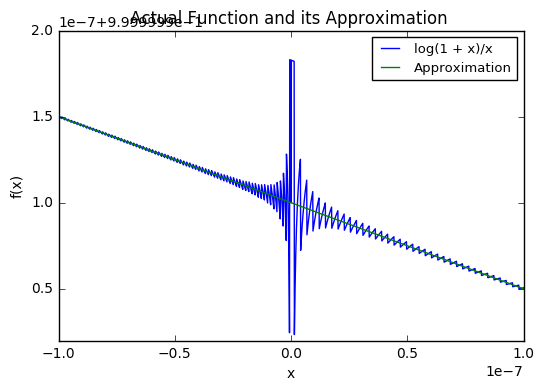

In [18]:
np.seterr(divide='ignore', invalid='ignore')
end = .0000001
approx = []
approy = []
x = np.linspace(-end,end,2001)
y = np.where(x == 0, 1.0, np.log(1 + x)/x)

for i in x:
    approx.append(i)
    approy.append(Taylor(i))
plt.plot(x,y, label = 'log(1 + x)/x')
plt.plot(approx,approy, label = 'Approximation')
plt.legend(prop={'size':9.5})
plt.title('Actual Function and its Approximation ')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

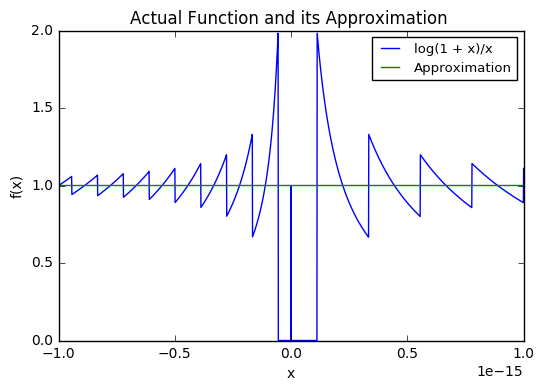

In [19]:
np.seterr(divide='ignore', invalid='ignore')
end = .000000000000001
approx = []
approy = []
x = np.linspace(-end,end,2001)
y = np.where(x == 0, 1.0, np.log(1 + x)/x)

for i in x:
    approx.append(i)
    approy.append(Taylor(i))
plt.plot(x,y, label = 'log(1 + x)/x')
plt.plot(approx,approy, label = 'Approximation')
plt.legend(prop={'size':9.5})
plt.title('Actual Function and its Approximation ')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

The three graphs show that the approximation isn't great for larger values of x but is fantastic for smaller values of x. The issue is that the computer had to compute divsion by a really small number which ended up going past the memory the computer has. When this happens, the computer has to round and chop the numbers leading to deviations from the actual value of the function. The approximation is a better representation of the function around the point zero because as $x \rightarrow 0$ the expansion is just $1$. Analytically, that's also true for our given function, but isn't true when we have to represent it numerically. 

### Approximation Error
The $Q_5$ term we got when using the taylor expansion of our function can be thought of as the computational error from the finite memory of a computer. We already know the smallest number we can increment by, machine epsilon, which is around $10^{-16}$. So with this bit of information we can put a bound on the largest x we can use. First, lets take a look at the error bound

$$Q_5 = \frac{x^4}{5(1 + \xi)^5}$$.

We are trying to find the maximum value in which x can be, and in order for that to happen the denominator has to be a minium, which happens when $\xi = 0$. What we are left with is

$$\big|Q_5\big| = \Bigg|\frac{x^4}{5(1 + \xi)^5}\Bigg| \leq \Bigg|\frac{x^4}{5}\Bigg|$$.

To find the largest $x$, we just bound the error by $10^{-16}$ and solve for the $x$ value that gives us that upper bound.

$$\Bigg|\frac{x^4}{5}\Bigg| \leq 10^{-16} \rightarrow x \leq (5 \times 10^{-16})^\frac{1}{4} = 1.4953 \times 10^{-4}$$

The largest x we can use would be $x = 1.4953 \times 10^{-4}$ in order to be below our $10^{-16}$ bound.